## 사용 파일 list
- SDB2_A_ID : 차주정보
- SDB2_I_CT_RLPS  : 계약 관계자 정보
- SDB2_I_CT_COUNT_PVT : 보험계약 정보
- SDB2_I_CT_MGG_PVT : 보험 담보 정보
- SDB2_I_PT_PMNT : 청구지급사유 정보
- SDB2_I_PT_PNTDTL : 청구지급 상세 사유정보(지급 금액이 여기있음)


* SDB2_I_PT_CONT
-> 가입경로 코드가 있기 떄문에 프로젝트 방향성에 따라서필요할 수도

### 전처리는 '개인' 중심으로 진행했습니다. 

- 라이브러리 임포트 &파일 불러오기
- 파일 이름 =  데이터 프레임 이름

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

files = os.listdir('C:/Users/82106/OneDrive/바탕 화면/최종플젝/use_table/')

for i in files:
    globals()[i.split('.')[0]] = pd.read_csv(f'C:/Users/82106/OneDrive/바탕 화면/최종플젝/use_table/{i}')

# 1.차주 정보 테이블 (SDB2_A_ID)
## 컬럼 구성 
- 차주 일련번호 (JOIN_SN) 
- 차주 구분코드 (JOIN_SN_TYP) 1:개인 3:법인
- 생년 (BTH_YR) 법인:0000 
- 성별 (GENDER) 0법인사업자 1:남 2:여
- 내국인 (IS_KRN) 1:내국 2:외국 3 법인

- -------------------------------------------------
- '내국인 & 개인'에 대한 정보만 남김 ->SDB_A_ID_PER

- '외국인 & 기업'에 대한 정보 -> SDB_A_ID_GROUP
- -------------------------------------------------
* 특이사항 
- 한 차주가 JOIN_SN =='248157' 개인, 법인 두가지에 해당됨

In [7]:
#기본 정보 확인
display(SDB2_A_ID)
display(SDB2_A_ID.info())

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,787068,1,1984,2,1
1,1630591,1,2010,2,1
2,746631,1,1985,1,1
3,936890,1,2010,1,1
4,1850766,1,1959,1,1
...,...,...,...,...,...
49129,158999,1,1964,1,1
49130,1731608,1,1976,2,1
49131,656440,1,1973,1,1
49132,285890,1,1962,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49134 entries, 0 to 49133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JOIN_SN      49134 non-null  int64
 1   JOIN_SN_TYP  49134 non-null  int64
 2   BTH_YR       49134 non-null  int64
 3   GENDER       49134 non-null  int64
 4   IS_KRN       49134 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


None

In [5]:
# 전처리 (개인에 관련된 내용만 남기기)

# 차주구분-법인 & 생년-0000 & 성별-0 & 내국인2,3 제거
# SDB2_A_ID_PER : 전처리 한 데이터 프레임 이름
#SDB2_A_ID_PER = SDB2_A_ID.loc[(SDB2_A_ID['JOIN_SN_TYP']=='1')& (SDB2_A_ID['GENDER'].isin(['1','2'])) & (SDB2_A_ID['IS_KRN']=='1')]
SDB2_A_ID_PER = SDB2_A_ID.loc[(SDB2_A_ID['JOIN_SN_TYP']==1)\
                              & (SDB2_A_ID['GENDER'].isin([1,2]))\
                                  & (SDB2_A_ID['IS_KRN']==1)]
SDB2_A_ID_PER

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,787068,1,1984,2,1
1,1630591,1,2010,2,1
2,746631,1,1985,1,1
3,936890,1,2010,1,1
4,1850766,1,1959,1,1
...,...,...,...,...,...
49129,158999,1,1964,1,1
49130,1731608,1,1976,2,1
49131,656440,1,1973,1,1
49132,285890,1,1962,2,1


In [6]:
# 법인 생년 확인결과 같이 처리된것을 확인
display(SDB2_A_ID_PER[SDB2_A_ID_PER['BTH_YR']==0000])
print('~'*30)
# 개인만 남은것 확인 #48285건
print(SDB2_A_ID_PER['JOIN_SN_TYP'].value_counts())
print('~'*30)
# 남은 차주가 유니크 한지 확인
print(SDB2_A_ID_PER['JOIN_SN'].nunique())
print('~'*30)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
JOIN_SN_TYP
1    48285
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
48285
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [8]:
# 원본 차주데이터에서 전처리한 (빠진 차주의 번호를 구해보자 -> 다른 테이블에 있다면 같이 없애줘야 하는게 맞을것같아서)

SDB2_A_ID['JOIN_SN'] = SDB2_A_ID['JOIN_SN'].astype(str)
SDB2_A_ID_PER['JOIN_SN'] = SDB2_A_ID_PER['JOIN_SN'].astype(str)

print(SDB2_A_ID['JOIN_SN'].count(), SDB2_A_ID_PER['JOIN_SN'].count())
print(SDB2_A_ID['JOIN_SN'].count()- SDB2_A_ID_PER['JOIN_SN'].count())

49134 48285
849


C:\Users\82106\AppData\Local\Temp\ipykernel_29760\3146832086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDB2_A_ID_PER['JOIN_SN'] = SDB2_A_ID_PER['JOIN_SN'].astype(str)


In [9]:
# 반대 전처리 (외국인, 기업 )
SDB2_A_ID_group = SDB2_A_ID.loc[(SDB2_A_ID['JOIN_SN_TYP']==3)\
                              | (SDB2_A_ID['GENDER']==0)\
                                  | (SDB2_A_ID['IS_KRN'].isin([2,3]))]
display(SDB2_A_ID_group)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
16,768519,3,0,0,0
28,627538,3,0,0,0
64,695698,3,0,0,0
93,56031,3,0,0,0
172,1622828,3,0,0,0
...,...,...,...,...,...
48644,299534,3,0,0,0
48702,1907241,3,0,0,0
48752,25305,3,0,0,0
48817,373506,3,0,0,0


In [10]:
#완전히 겹치는게 없는지 한번 더 확인
display(SDB2_A_ID_PER[SDB2_A_ID_PER['JOIN_SN'].isin(SDB2_A_ID_group['JOIN_SN'])])
display(SDB2_A_ID_group[SDB2_A_ID_group['JOIN_SN']=='248157'])

#겹치는 데이터 발견
#기업 및 개인 중복 차주
#딱 한사람 존재함 JOIN_SN == '248157'

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
21376,248157,1,2008,2,1


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
44659,248157,3,0,0,0


### <추가>날짜 기준을 정해야할듯
- 왜? -> 미자의 기준이 달라지기 때문에 (차주정보에서 미자들을 어떻게 할 것인가) 
- 1. 202007월로 하자 (why? 보험 계약, 담보 정보테이블에서 기준 년월 컬럼이 06월까지 있기 때문 )
- 2. 사고 최신 날짜를 검색해서 보는건? => 사고 발생월 확인결과 202006이 가장 최신
- 3. 보험료 지급 날짜 중 가장 최신 확인 => 202006이 가장 최신

프로젝트에서 기준 년도 2020년 
미자 : 윤나이 발생 전이므로 2002년생이 미자로 취급받을 시점
2002년생 이후 차주의 수 : (9041)명

검색결과 미성년자도 차량 소유 가능/그렇다면 미자를 처리안해도 될듯하다. 
단, 차량보험 가입은 만20-21세로 제한되어있는 상태

In [11]:
#2020년 기준 미성년자 수 count//9041명
SDB2_A_ID_PER[SDB2_A_ID_PER['BTH_YR']>2001]['BTH_YR'].count()

#미성년자 차주 모음 (변수명 mija)//
mija = SDB2_A_ID_PER[SDB2_A_ID_PER['BTH_YR']>2001]
mija

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
1,1630591,1,2010,2,1
3,936890,1,2010,1,1
7,1482450,1,2005,2,1
21,508730,1,2006,1,1
23,79485,1,2009,2,1
...,...,...,...,...,...
49097,1143589,1,2010,1,1
49098,287468,1,2010,1,1
49101,1859443,1,2009,2,1
49102,1850969,1,2010,2,1


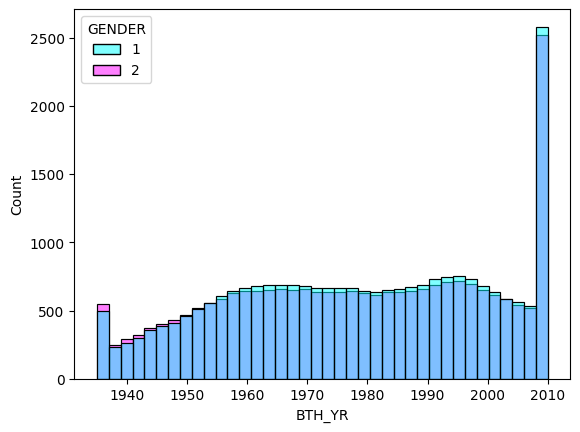

In [12]:
# 차주의 생년 분포 확인
bth = sns.histplot(data = SDB2_A_ID_PER, \
                   x= 'BTH_YR',\
                    hue='GENDER',\
                    hue_order=['1:남성','2:여성'],\
                    palette='cool')
# 2010년생 이후 차주들이 가장 많았고 (4576)명
# 1935년 이전 출생이 (857명)
# 남, 여의 비율은 비슷한 편

In [13]:
# 1935년 이전 고객의 수 //857명
SDB2_A_ID_PER[SDB2_A_ID_PER['BTH_YR']==1935]['BTH_YR'].count()

857

# 2.(보험)계약 관계자 정보 테이블 (SDB2_I_CT_RLPS)
## 컬럼 구성 
- 차주 일련번호 (JOIN_SN) 
- 차주 구분코드 (JOIN_SN_TYP) : 1개인
- 업권코드-삭제예정 (SCTR_CD)
- 기관일련번호 (COM_SN):unique key로 활용가능할 듯 하여 보류
- 증권번호 (POL_SN)
- 계약관계자유형코드 (CT_RLPS_GBN_CD): C 계약자/I 피보험
- 관계코드 (CT_IN_RLTN_CD)
- 개인여부 (IS_INDIV): 1개인/0개인아님(그룹)
- 거주지역코드 (GIS_CD)
- -------------------------------------------------
- '개인'에 대한 정보만 남김 ->SDB2_I_CT_RLPS_PER
- 삭제 컬럼 : 업권코드, (기관일련번호), 개인여부, 자사여부
- -------------------------------------------------
* 특이사항 
    - 계약건수가 엄청 많은 차주가 있음(60건 보유자 2명)
    

In [14]:
#전처리
#1. 차주일련번호 object로 변경
SDB2_I_CT_RLPS['JOIN_SN'] = SDB2_I_CT_RLPS['JOIN_SN'].astype(str)

#2. IS_INDIV컬럼 이용해서 '개인'인 정보만 남기기
SDB2_I_CT_RLPS_PER = SDB2_I_CT_RLPS.loc[(SDB2_I_CT_RLPS['IS_INDIV']==1)]
SDB2_I_CT_RLPS_PER 

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1486482,1,6,7623841,0,1771111,C,99,1,34
1,15110,1,8,6937331,0,2197182,C,1,1,11
2,993239,1,6,8573374,0,2471577,C,99,1,34
3,1412979,1,8,8532740,0,5984883,I,1,1,31
4,451383,1,6,8845001,0,6088957,I,1,1,31
...,...,...,...,...,...,...,...,...,...,...
379023,1482703,1,8,3685558,0,9493522,C,1,1,99
379024,368880,1,6,7497975,0,3084080,C,1,1,99
379025,1284883,1,6,9279409,0,8695881,I,1,1,11
379026,1567278,1,8,9281635,0,8145242,C,1,1,37


In [15]:
# 데이터 정합성 확인 -> 정말 개인만 남은것인가?
print((SDB2_I_CT_RLPS_PER['JOIN_SN'].isin(SDB2_A_ID_PER['JOIN_SN'])).sum())

# 크로스 체크 -> 정말 기업은 빠진건가 ?
print((SDB2_I_CT_RLPS_PER['JOIN_SN'].isin(SDB2_A_ID_group['JOIN_SN'])).sum())

378021
0


In [16]:
#유니크한 차주 개수 46043
print(SDB2_I_CT_RLPS_PER['JOIN_SN'].nunique())

# 두 개 이상 보험 가진 차주 40671명 
(SDB2_I_CT_RLPS_PER.groupby('JOIN_SN')['JOIN_SN_TYP'].count()>=2).sum()

46043


40671

,JOIN_SN_TYP
JOIN_SN,
1000023,15
1000079,19
1000114,5
1000120,1
1000121,13
...,...
999850,2
999884,7
999887,17


~~~~~~~~~~~~~~~~~~~~


JOIN_SN_TYP    60
dtype: int64

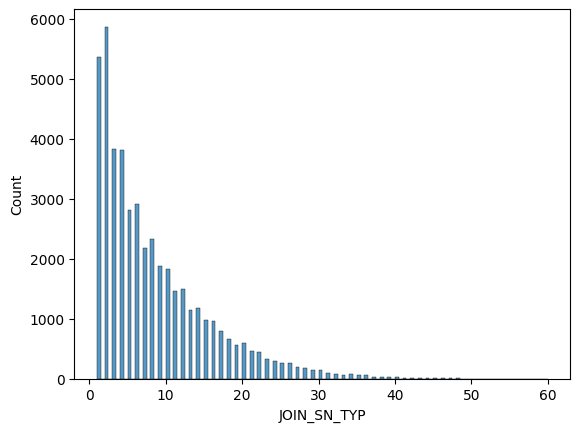

In [17]:
# 차주들의 보험 건수 시각화 //최대 60건까지 가지고있는 차주가 있음(2명)(30415	, 422192)
# 나영님이 보내주신 블로그에서 전체 고객의 30퍼센트가 70퍼센트의 수익을 낸다는 글을 봤음...!
# 이상치가아닌 우량고객으로 분류?
# 군집화 할때 계약건수 피쳐 넣는건 어떨까?

cnt = pd.DataFrame(SDB2_I_CT_RLPS_PER.groupby('JOIN_SN')['JOIN_SN_TYP'].sum())
display(cnt)
print('~'*20)
display(cnt.max())
cnt_ax = sns.histplot(data = cnt, x='JOIN_SN_TYP')

In [18]:
# 증권고유개수가 고유 차주수보다 많은걸로 보아 보험을 여러개 가입할때 여러은행으로 설정한듯 싶음
SDB2_I_CT_RLPS_PER['COM_SN'].nunique()

#보험 60개 가입한 유저 30415의 COM_SN 고유개수 6개
SDB2_I_CT_RLPS_PER[SDB2_I_CT_RLPS_PER['JOIN_SN']=='30415']['COM_SN'].nunique()

6

In [19]:
#미성년자인 차주의 보험 확인// 전체보험 중 30438
SDB2_I_CT_RLPS_PER['JOIN_SN'].isin(mija['JOIN_SN']).sum()

30438

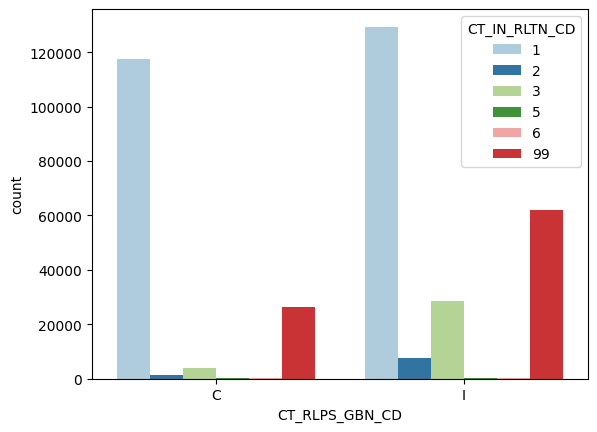

In [20]:
#  계약자 피보험자 수
RLPS = sns.countplot(data=SDB2_I_CT_RLPS_PER ,\
                     x ='CT_RLPS_GBN_CD',\
                          hue='CT_IN_RLTN_CD',\
                            palette='Paired')

- 계약자와 피보험자 관계가 왜 필요한가
- 보험비를 지불하는 돈내는 사람이 중요한거 아닐까?/편향된 생각인가
- 아이데이션이 필요하다...
- 이걸 정의해야 컬럼의 쓰임을 정할 수 있을듯
(아직 쓰임새를 몰라 날리기가 망설여짐)

In [21]:
# 계약자/피보험자 수 
print('계/피',SDB2_I_CT_RLPS_PER['CT_RLPS_GBN_CD'].value_counts())
print('~'*30)

# 계- 피 관계 구성
print('계/피 관계코드',SDB2_I_CT_RLPS_PER['CT_IN_RLTN_CD'].value_counts())

계/피 CT_RLPS_GBN_CD
I    228594
C    149427
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
계/피 관계코드 CT_IN_RLTN_CD
1     246689
99     88520
3      32686
2       9174
5        487
6        465
Name: count, dtype: int64


C:\Users\82106\AppData\Local\Temp\ipykernel_29760\4037807166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  RLPS = sns.countplot(data=SDB2_I_CT_RLPS_PER ,\


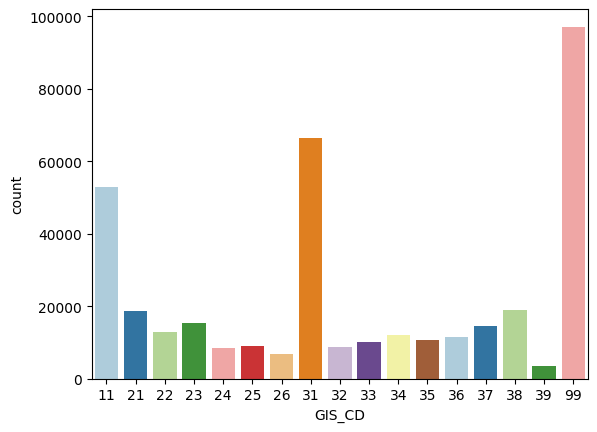

In [22]:
# 거주지역 확인
RLPS = sns.countplot(data=SDB2_I_CT_RLPS_PER ,\
                     x ='GIS_CD',\
                     palette='Paired')
#경기-서울-없음(?)순으로 많음 거주지역없는거 말이되나... 
# 입력안한걸로 추정이지만 확인이 필요-> 확인은 어떻게...? 

# 3.보험 계약 정보 (SDB2_I_CT_COUNT_PVT)
## 컬럼 구성 
- 업권코드 (SCTR_CD) : 삭제예정
- 증권번호 (POL_SN)
- 단체보험여부 (IS_GRP_INS) : 1 단체, 0 단체보험 아님
- 보험종류 코드 (INS_GBN_CD)
- 주계약상태코드, 보험계약 체결월, 해지월, 보험 시기월, 종기월, 실효월, 부활월
- 납입보험료 (CT_PY_AMT)
- 납입주기 코드 (CT_PY_CYCLE_CD) : 01-일시납, 02-매월납, 03-년납, 99-기타
- 진단계약여부 (IS_CT_DIGNS): 1-진단계약. 0- 진단계약 아님
- 인수심사결과 코드 -> 구성확인 필요
- 가입경로 코드 (CT_CHNL_CD)
- 기준 년월 
- -------------------------------------------------
- '개인'에 대한 정보만 남김 -> SDB2_I_CT_COUNT_PVT_PER
    (단체 보험 제외 why? -> 단체보험은 회사에서 가입하는것이라 개인의 선택이 적다고 판단.)

- SDB2_I_CT_RLPS_PER 테이블에서 개인만 남긴 증권번호와 비교해서 추가적을 count1(572명)을 걸러낸 최종 개인 데이터 -> count2 = SDB2_I_CT_COUNT_PVT_PER_2

- 삭제 컬럼 : 업권코드, 단체보험(전처리 후 삭제),계약진단여부, 인수심사결과 코드, 기준년월중 몇개..
- -------------------------------------------------
* 특이사항 
- 보험실효, 부활월의 값이 999912인 경우 점수화(?)를통해 LTV에 써먹을 수있지않을까 하는 생각
- 보험료 납입이 1억 2천인 사람 확인결과 일시납인경우를 확인 3명중 1명은 종신보험이 아님... 3년만기 상품인데 이렇게 큰 금액? (증권번호 - 7453475	)

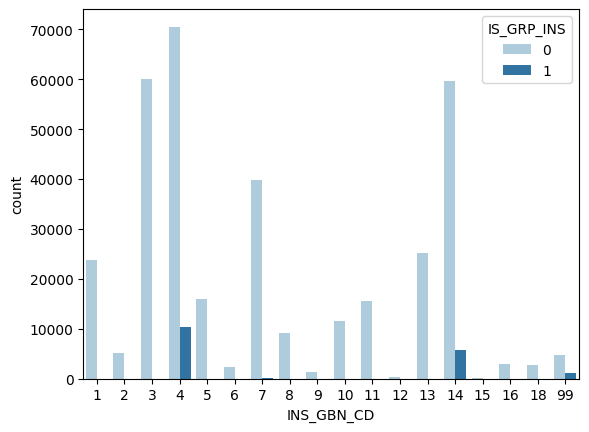

In [23]:
#보험 종류에 따른 단체/개인 구성비율
count_ax = sns.countplot(data = SDB2_I_CT_CONT_PVT,\
                         x='INS_GBN_CD',\
                         hue='IS_GRP_INS',\
                            palette='Paired')
#단체 보험은 4.상해보험, 14.여행자보험 99.기타 보험에서 나타남.

In [27]:
#단체 보험 /아닌것 개수
print(SDB2_I_CT_CONT_PVT['IS_GRP_INS'].value_counts())
SDB2_I_CT_COUNT_PVT_PER = SDB2_I_CT_CONT_PVT[SDB2_I_CT_CONT_PVT['IS_GRP_INS']==0]
SDB2_I_CT_COUNT_PVT_PER

IS_GRP_INS
0    350905
1     17578
Name: count, dtype: int64


,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,...,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,...,1,1,1,1,1,1,1,1,1,1
2,6,7995898,0,7,2,201409,999912,201409,999912,999912,...,0,0,0,0,0,0,0,0,0,0
3,8,9743978,0,4,7,201604,201704,201604,201704,999912,...,1,1,1,1,1,1,1,1,1,1
4,6,9040681,0,4,2,201804,999912,201804,204804,999912,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,8,6242384,0,7,2,201212,999912,201212,203812,999912,...,1,1,1,1,1,1,1,1,1,1
368479,6,2265670,0,14,5,201604,999912,201604,201604,999912,...,1,1,1,1,1,1,1,1,1,1
368480,6,6050915,0,7,7,200902,201107,200902,201902,999912,...,1,1,1,1,1,1,1,1,1,1
368481,6,9901184,0,14,2,201809,999912,201809,201902,999912,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#데이터 정합성 체크 -> 모두 개인만 남은게 맞나
#보험관계자정보 테이블의 증권번호 가져와서 비교
SDB2_I_CT_COUNT_PVT_PER['POL_SN'] = SDB2_I_CT_COUNT_PVT_PER['POL_SN'].astype(str)
SDB2_I_CT_RLPS_PER['POL_SN'] = SDB2_I_CT_RLPS_PER['POL_SN'].astype(str)

print((SDB2_I_CT_COUNT_PVT_PER['POL_SN'].isin(SDB2_I_CT_RLPS_PER['POL_SN'])).sum())


#기업은 없는게 맞나
#(보험 관계자 정보 테이블이랑 증권번호 비교했을 떄 없는경우는 무슨..?)

#count1 = 관계자 테이블에 증권번호가 없는경우 <-> count2 있는경우 
count1 = SDB2_I_CT_COUNT_PVT_PER[~SDB2_I_CT_COUNT_PVT_PER['POL_SN'].isin(SDB2_I_CT_RLPS_PER['POL_SN'])]
count2 = SDB2_I_CT_COUNT_PVT_PER[SDB2_I_CT_COUNT_PVT_PER['POL_SN'].isin(SDB2_I_CT_RLPS_PER['POL_SN'])]

C:\Users\82106\AppData\Local\Temp\ipykernel_29760\2677558778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDB2_I_CT_COUNT_PVT_PER['POL_SN'] = SDB2_I_CT_COUNT_PVT_PER['POL_SN'].astype(str)
C:\Users\82106\AppData\Local\Temp\ipykernel_29760\2677558778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDB2_I_CT_RLPS_PER['POL_SN'] = SDB2_I_CT_RLPS_PER['POL_SN'].astype(str)


350333


In [35]:
print('count1 :',count1['POL_SN'].count(), 'count2 :',count2['POL_SN'].count())

count1 : 572 count2 : 350333


In [37]:
#만약 두 테이블이 모두 전처리 전이면 있을수도?--->확인결과 있음 ^^
# count1의 개수 572는 SDB2_I_CT_RLPS 테이블 전처리시 개인이 아니라 제거한 증권번호에 해당
# 개인이 아니라 전에도 지웠기 때문에 일관적으로 지우는게 맞다고 생각.
#개인이 아니라 지운 증권번호는 계속 가지고 다니며 다른 테이블에서 확인 후 지우는방향?
# count1['POL_SN']은 지우는걸로


SDB2_I_CT_CONT_PVT['POL_SN'] = SDB2_I_CT_CONT_PVT['POL_SN'].astype(str)
SDB2_I_CT_RLPS['POL_SN'] = SDB2_I_CT_RLPS['POL_SN'].astype(str)
print(SDB2_I_CT_CONT_PVT['POL_SN'].count())
print((SDB2_I_CT_CONT_PVT['POL_SN'].isin(SDB2_I_CT_RLPS['POL_SN'])).sum())

368483
368483


In [39]:
SDB2_I_CT_COUNT_PVT_PER_2 = count2.copy()

2006-12-01 00:00:00


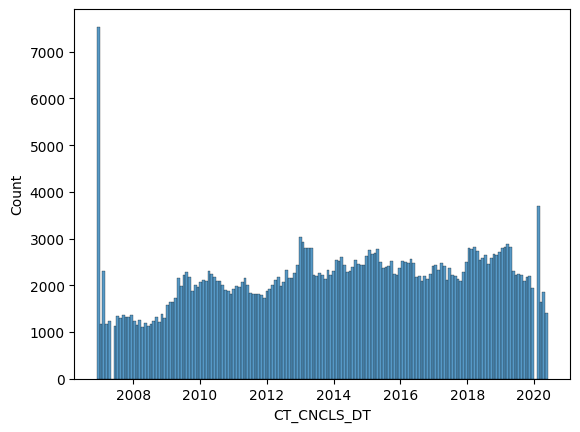

In [43]:
# 데이터 중 최초 보험 계약 체결월 
SDB2_I_CT_COUNT_PVT_PER_2['CT_CNCLS_DT']= pd.to_datetime(SDB2_I_CT_COUNT_PVT_PER_2['CT_CNCLS_DT'], format='%Y%m')
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_CNCLS_DT'].min())

CNCLS_ax = sns.histplot(data = SDB2_I_CT_COUNT_PVT_PER_2, x='CT_CNCLS_DT', bins=163)

In [44]:
#매 달 체결된 보험 건수 
print(SDB2_I_CT_COUNT_PVT_PER_2.groupby('CT_CNCLS_DT')['SCTR_CD'].count())

CT_CNCLS_DT
2006-12-01    7536
2007-01-01    1178
2007-02-01    1165
2007-03-01    1150
2007-04-01    1174
              ... 
2020-02-01    1898
2020-03-01    1798
2020-04-01    1644
2020-05-01    1847
2020-06-01    1413
Name: SCTR_CD, Length: 163, dtype: int64


- 보험 실효란 ?
     - 보험계약의 효력이 없어지는 것
     - 2달 연속 보험료가 출금되지 않을때 발생
     - 밀린 보험료 2달치를 지불하면 정상적으로 돌아옴. 

     문제는 3달치 보험료를 밀렸을 떄.
     정상적인 방법으로는 돌이킬 수 없음 -> 부활을 통해가능
- 보험 부활이란?
     - 처음 보험계약을 가입했을때와 같은 조건, 즉, 같은 보장과 같은 보험료로 보험계약을 유지할 수 있도록 조치를 취하는 것
     ----------------------------
     - 일반 실효해지와 차이점 
          - 밀린 보험료 일괄 납부
          - 연체기간 중 질병 발생 여부 고지
          - 부활 청약서 서명

    

In [51]:
#보험 시기월
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_ST_DT'].max())
#보험 계약 해지
#(SDB2_I_CT_COUNT_PVT_PER_2['CT_TRMNT_DT']==999912).sum()
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_TRMNT_DT'].max(), (SDB2_I_CT_COUNT_PVT_PER_2['CT_TRMNT_DT']==999912).sum())

#보험 종기월
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_END_DT'].max(), (SDB2_I_CT_COUNT_PVT_PER_2['CT_END_DT']==999912).sum())
#보험 실효월
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_EFCTV_DT'].max(), (SDB2_I_CT_COUNT_PVT_PER_2['CT_EFCTV_DT']==999912).sum())
#보험 부활월
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_RST_DT'].max(), (SDB2_I_CT_COUNT_PVT_PER_2['CT_RST_DT']==999912).sum())


202006
999912 270596
999912 76036
999912 329874
999912 340927


- 보험 실효, 부활월의 값이 '999912' 인경우 이력이 없다는 뜻  
-> 연체없이 납입을 잘 하는 중   
-> LTV계산에 쓸 수 있지 않을까?

In [ ]:
#미성년자 차주의 보험 종류 확인하기 -> 만약 차 보험이 있다면? 제일 젊은? 친구를 찾아라
mija_POL = SDB2_I_CT_RLPS_PER.loc[SDB2_I_CT_RLPS_PER['JOIN_SN'].isin(mija['JOIN_SN'])]
SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'].isin(mija_POL['POL_SN'])]['']

INS_GBN_CD
7     20898
14    12345
3      5298
4      4203
8      1470
1      1127
10     1008
11      909
16      521
5       355
99      196
12      141
13      138
2       112
18       15
9         7
6         3
Name: count, dtype: int64


C:\Users\82106\AppData\Local\Temp\ipykernel_29760\592931582.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  mija_GBN = sns.histplot(data = SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'].isin(mija_POL['POL_SN'])]\


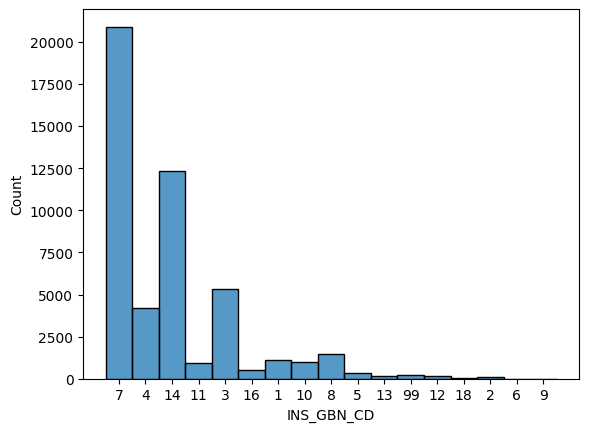

In [61]:
# 자동차 보험 17은 의무 , 운전자 보험은 선택,
SDB2_I_CT_COUNT_PVT_PER_2['INS_GBN_CD']= SDB2_I_CT_COUNT_PVT_PER_2['INS_GBN_CD'].astype(str)
print(SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'].isin(mija_POL['POL_SN'])]['INS_GBN_CD'].value_counts())
mija_GBN = sns.histplot(data = SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'].isin(mija_POL['POL_SN'])]\
                        , x = 'INS_GBN_CD'\
                        ,palette='Paired')

#운전자 보험이 있는걸로 보아 미자기준년도 수정이 필요할것으로 생각됨
#미자 특성상 7번 어린이 보험이 가장 많은걸 알 수있음/ 14번은 여행자 보험임
#17번 자동차 보험은 없는데 운전자 보험은 있는 아이러니


In [77]:
#납입 보험료 /코드/ 납입기간
# SDB2_I_CT_COUNT_PVT_PER_2 / CT_PY_AMT/ CT_PY_CYCLE_CD/ CT_PY_PD
#amt_ax = sns.histplot(data = SDB2_I_CT_COUNT_PVT_PER_2, x='CT_PY_AMT')
print(SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT'].agg([min,max]))
print((SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']==1200000).sum())
display(SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']==1200000])
display(SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']==1][['CT_EFCTV_DT','CT_RST_DT','CT_PY_AMT','CT_PY_CYCLE_CD','CT_PY_PD']])

min          1
max    1200000
Name: CT_PY_AMT, dtype: int64
3


,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
110325,8,9575679,0,11,1,2020-04-01,999912,202004,999912,999912,...,0,0,0,0,0,0,0,1,0,0
115933,8,7453475,0,11,2,2020-02-01,999912,202002,202302,999912,...,0,0,0,0,0,1,1,1,1,1
288954,8,9575679,0,11,2,2020-04-01,999912,202004,999912,999912,...,0,0,0,0,0,0,0,0,1,1


,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD
43,999912,999912,1,1,0
147,999912,999912,1,1,0
173,999912,999912,1,3,1
179,999912,999912,1,2,32
250,999912,999912,1,3,1
...,...,...,...,...,...
368109,999912,999912,1,1,0
368127,999912,999912,1,2,16
368131,999912,999912,1,1,0
368253,999912,999912,1,3,1


# 보험 납입 금액이 1인경우는 대체 무슨경우?->일시납, 매월, 매년 모두 존재함, /납입기간도 가지각색

In [81]:
SDB2_I_CT_COUNT_PVT_PER_2\
[['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
       'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD']]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD
0,6,3023157,0,3,7,2008-06-01,200903,200806,200906,999912,999912,10,2,1
1,8,2067576,0,1,2,2010-12-01,999912,201012,999912,999912,999912,33,2,20
2,6,7995898,0,7,2,2014-09-01,999912,201409,999912,999912,999912,52,2,30
3,8,9743978,0,4,7,2016-04-01,201704,201604,201704,999912,999912,170,3,1
4,6,9040681,0,4,2,2018-04-01,999912,201804,204804,999912,202006,43,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,8,6242384,0,7,2,2012-12-01,999912,201212,203812,999912,999912,47,2,10
368479,6,2265670,0,14,5,2016-04-01,999912,201604,201604,999912,999912,31,1,0
368480,6,6050915,0,7,7,2009-02-01,201107,200902,201902,999912,999912,15,2,10
368481,6,9901184,0,14,2,2018-09-01,999912,201809,201902,999912,999912,96,1,0


C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) miss

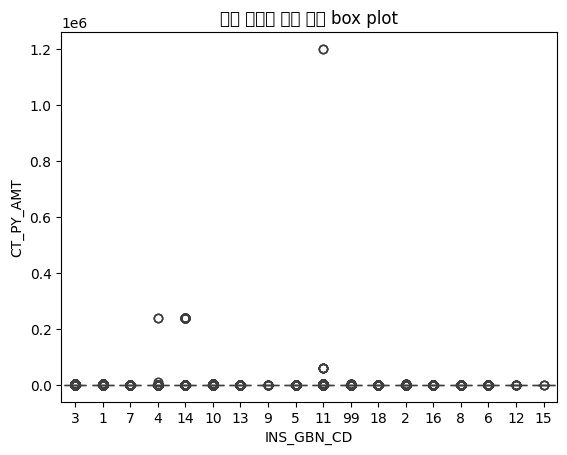

In [78]:
sns.boxplot(x="INS_GBN_CD", y="CT_PY_AMT", data=SDB2_I_CT_COUNT_PVT_PER_2)
plt.title("가입 보험별 납입 금액 box plot")
plt.show()
#여행자, 상해,저축보험에서 엄청 큰 이상치 발견

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48145 (\N{HANGUL SYLLABLE MIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing

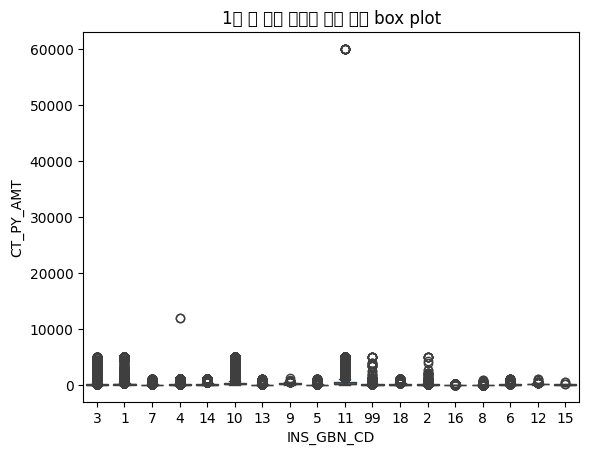

In [83]:
#보험료 납입 1억 밑 사람들 가입 보험별 이상치 
under_1mil = SDB2_I_CT_COUNT_PVT_PER_2[SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']<100000]
sns.boxplot(x="INS_GBN_CD", y="CT_PY_AMT", data=under_1mil)
plt.title("1억 밑 가입 보험별 납입 금액 box plot")
plt.show()

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48145 (\N{HANGUL SYLLABLE MIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing

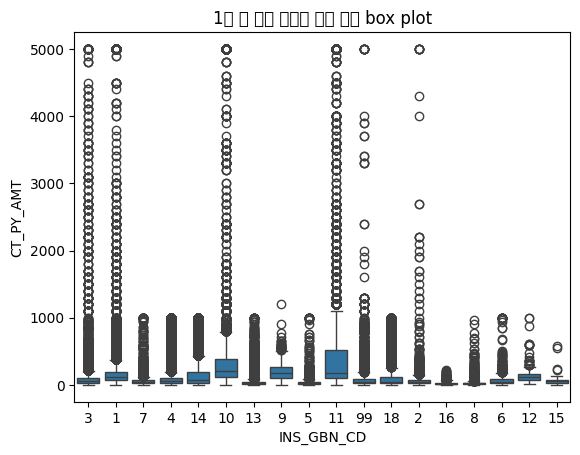

In [84]:
#보험료 납입 천만원 밑 사람들
under_1t = SDB2_I_CT_COUNT_PVT_PER_2[SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']<10000]
sns.boxplot(x="INS_GBN_CD", y="CT_PY_AMT", data=under_1t)
plt.title("1억 밑 가입 보험별 납입 금액 box plot")
plt.show()

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48145 (\N{HANGUL SYLLABLE MIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing

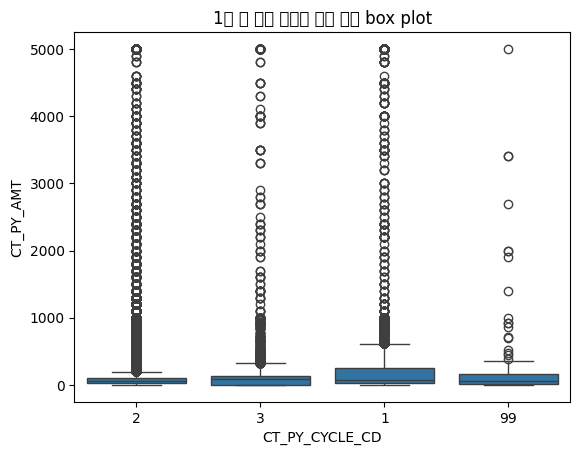

In [85]:
#보험료 납입 천만원 밑 사람들 납입 주기별로 나눈 이상치 
sns.boxplot(x="CT_PY_CYCLE_CD", y="CT_PY_AMT", data=under_1t)
plt.title("1억 밑 가입 보험별 납입 금액 box plot")
plt.show()

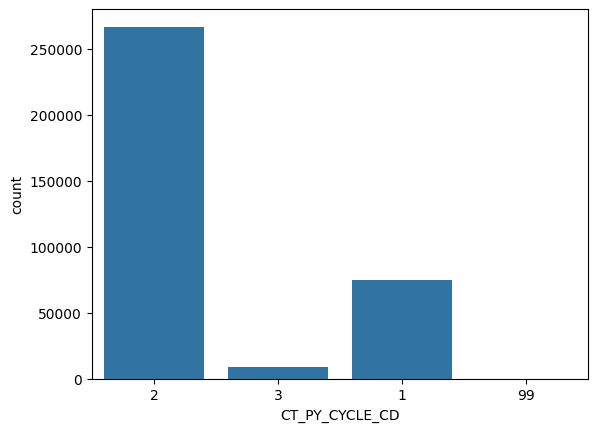

In [87]:
#납입 주기
SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_CYCLE_CD']=SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_CYCLE_CD'].astype(str)
CYCLE_CD_ax = sns.countplot(data = SDB2_I_CT_COUNT_PVT_PER_2, x='CT_PY_CYCLE_CD')

<Axes: xlabel='CT_CHNL_CD', ylabel='count'>

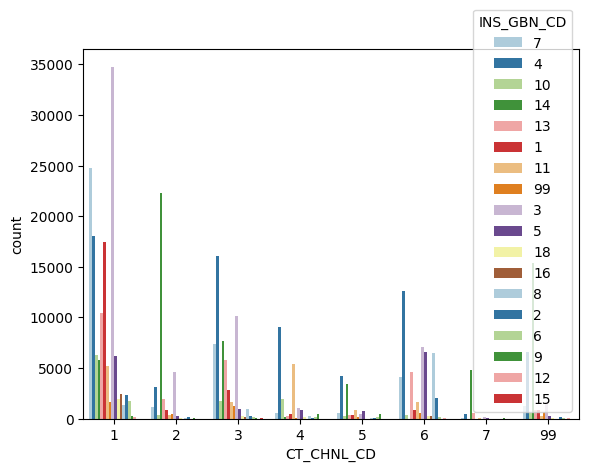

In [90]:
#가입 경로별 건수
sns.countplot(data = SDB2_I_CT_COUNT_PVT_PER_2, x='CT_CHNL_CD'\
              ,hue='INS_GBN_CD', palette='Paired')

#설계사(대면)으로 통해 들어온 것 중 질병 - 어린이 보험이 많음
#

In [91]:
#진단계약 여부?//0,1의 구분기준이 명확하게 쓰여있지않아 뭐가 뭔지 구분 할 수없어 사용못할듯.
SDB2_I_CT_COUNT_PVT_PER_2['IS_CT_DIGNS'].value_counts()

IS_CT_DIGNS
0    341974
1      8359
Name: count, dtype: int64

In [92]:
SDB2_I_CT_COUNT_PVT_PER_2['CT_JDGMT_CD'].value_counts()

CT_JDGMT_CD
1     340338
2       7673
4        766
99       653
6        552
3        293
5         38
7         20
Name: count, dtype: int64

In [93]:
SDB2_I_CT_COUNT_PVT_PER_2.loc[SDB2_I_CT_COUNT_PVT_PER_2['CT_PY_AMT']==1200000][['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
       'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD']]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD
110325,8,9575679,0,11,1,2020-04-01,999912,202004,999912,999912,999912,1200000,1,0
115933,8,7453475,0,11,2,2020-02-01,999912,202002,202302,999912,999912,1200000,1,0
288954,8,9575679,0,11,2,2020-04-01,999912,202004,999912,999912,999912,1200000,1,0


# 4.보험 담보 정보 (SDB2_I_CT_MGG_PVT)
## 컬럼 구성 
- 차주일련번호
- 차주구분 : 삭제예정
- 업권코드 (SCTR_CD) : 삭제예정
- 증권번호 (POL_SN)
- 보험 담보그룹코드
- 보험 담보코드 -> 차원의 저주에 빠지지않을까?
- 보험세부담보건수, 보험세부담보금액(sum, max,min)
- -------------------------------------------------
- '개인'에 대한 정보만 남김 -> SDB2_I_CT_MGG_PVT_PER
  

- 삭제 컬럼 : 업권코드, 담보코드 
- -------------------------------------------------
* 특이사항 
- 보험 담보코드 사용시 너무 많아 차원의 저주가 예상됩니다.
- 보험담보그룹코드만 사용하는건 어떨까요? 

In [94]:
#형변환
SDB2_I_CT_MGG_PVT['JOIN_SN'] = SDB2_I_CT_MGG_PVT['JOIN_SN'].astype(str)
SDB2_I_CT_MGG_PVT['POL_SN'] = SDB2_I_CT_MGG_PVT['POL_SN'].astype(str)


In [102]:
#개인만 남기기
#보험관계자 테이블에서 개인만 남긴 차주번호/ 보험계약테이블 개인만 남은 증권번호 
SDB2_I_CT_MGG_PVT_PER = SDB2_I_CT_MGG_PVT[(SDB2_I_CT_MGG_PVT['POL_SN'].isin(SDB2_I_CT_COUNT_PVT_PER_2['POL_SN']))\
                   & (SDB2_I_CT_MGG_PVT['JOIN_SN'].isin(SDB2_I_CT_RLPS_PER['JOIN_SN']))]

<Axes: xlabel='MGG_GRP_CD', ylabel='count'>

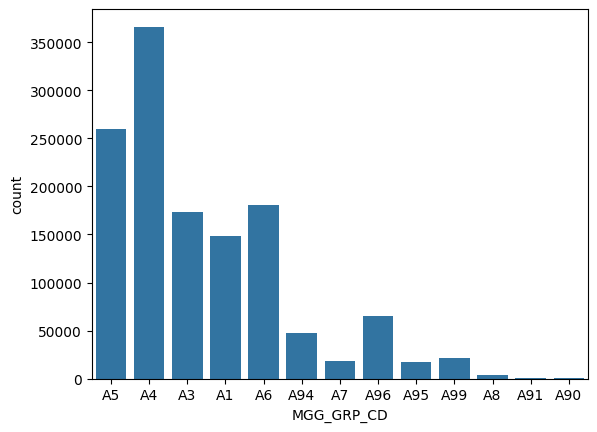

In [103]:
sns.countplot(data = SDB2_I_CT_MGG_PVT_PER, x= 'MGG_GRP_CD')
#진단-수술-입원 -후유장애 

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missin

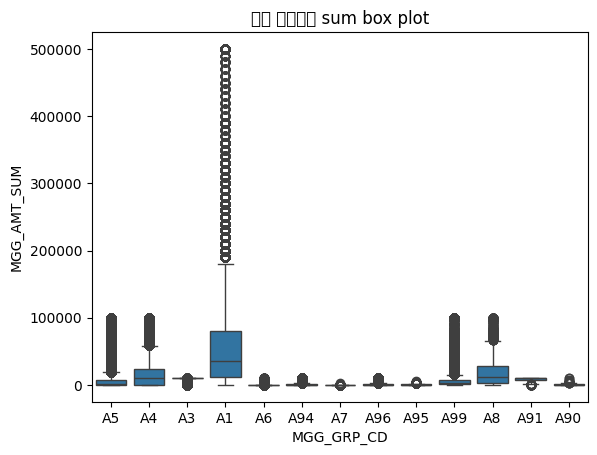

In [104]:
sns.boxplot(x="MGG_GRP_CD", y="MGG_AMT_SUM", data=SDB2_I_CT_MGG_PVT_PER)
plt.title("세부 담보금액 sum box plot")
plt.show()

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missin

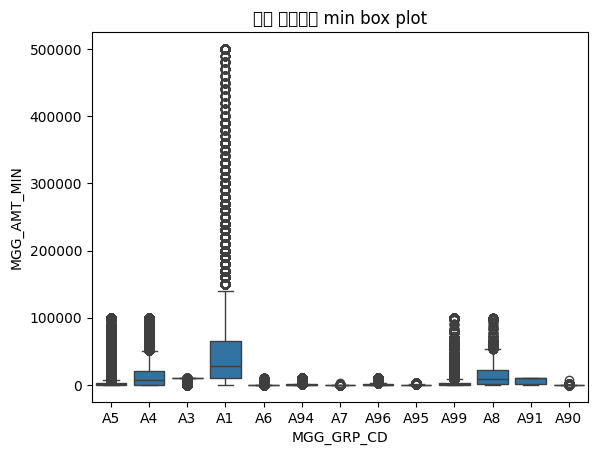

In [106]:
sns.boxplot(x="MGG_GRP_CD", y="MGG_AMT_MIN", data=SDB2_I_CT_MGG_PVT_PER)
plt.title("세부 담보금액 min box plot")
plt.show()

C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missin

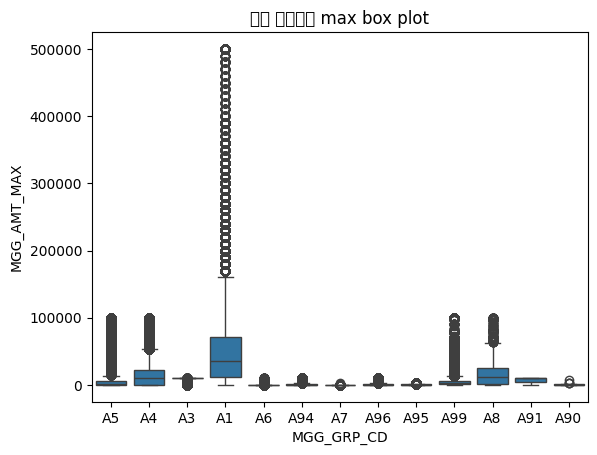

In [107]:
sns.boxplot(x="MGG_GRP_CD", y="MGG_AMT_MAX", data=SDB2_I_CT_MGG_PVT_PER)
plt.title("세부 담보금액 max box plot")
plt.show()

# 5 청구 지급 사유정보 (SDB2_I_PT_PMNT)

## 컬럼 구성 
- 사고번호
- 청구일련번호
- 업권코드 ->삭제 
- 증권번호 
- 보험종류코드
- 피해자물일련번호 ->삭제 
- 지급사유코드
- 지급월
- 지급조사여부
- 지급심사결과코드 
- -------------------------------------------------
- '개인'에 대한 정보만 남김 -> SDB2_I_PT_PMNT_PER
  

- 삭제 컬럼 : 업권코드, 담보코드 ,피해자물일련번호 
- -------------------------------------------------
* 특이사항 
- 사고번호 + 청구일련번호로 복수개의 지급결과 존재가능 -> 몇건을 지급받았는지 알 수있음 -> 최대 한 사고에서 47건을 보장받은 경우가 있음
- 지급사유코드도 많아 차원의 저주에 빠질 위험이 있음 몇개 카테고리로 묵는건 어떨지
- ex) A코드 : 정액보상/ B2:실손보상 ...

In [110]:
#증권번호에서 개인만 남기기
SDB2_I_PT_PMNT['POL_SN'] = SDB2_I_PT_PMNT['POL_SN'].astype(str)
SDB2_I_PT_PMNT_PER = SDB2_I_PT_PMNT[SDB2_I_PT_PMNT['POL_SN'].isin(SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'])]

In [111]:
SDB2_I_PT_PMNT_PER

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1
5,1632499,1375642,6,5097060,3,2199,B2002,201908,0,1
6,1088230,916913,6,9543023,13,2199,A1020,201911,0,1
...,...,...,...,...,...,...,...,...,...,...
67793,2218121,1127169,8,7431894,3,652,B2005,201905,0,1
67794,302072,1756207,6,7106786,4,23,B2002,201904,0,1
67796,1029524,867235,6,8830641,3,1930,B2002,201901,0,1
67797,1189558,592357,8,7362949,3,2947,A1009,201905,0,1


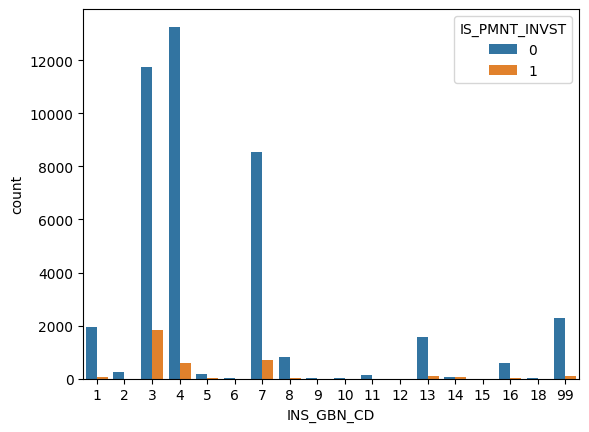

In [113]:
#보험 종류별 청구건수 및 지급조사 여부
GBN_CD_AX = sns.countplot(data = SDB2_I_PT_PMNT_PER, x='INS_GBN_CD', hue='IS_PMNT_INVST')

PMNT_JDGMNT_CD
1     39740
3      4794
11      350
2       189
22       23
21       13
13        7
12        1
Name: count, dtype: int64


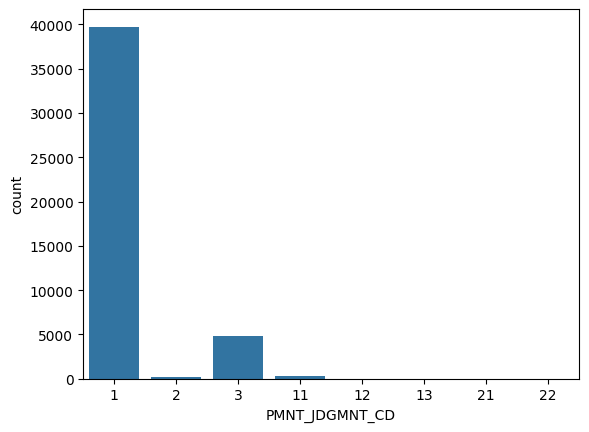

In [116]:
# 지급심사결과 코드
print(SDB2_I_PT_PMNT_PER['PMNT_JDGMNT_CD'].value_counts())
JDG_AX = sns.countplot(data = SDB2_I_PT_PMNT_PER, x='PMNT_JDGMNT_CD')
#면책 13- 일정액에 이르지 않는 작은 손해에 대해 보험사가 보상하지 않는 것
#환수 22 - 보험사가 보험금을 다시 되가져 가는 경우 
#환입 21- 보험사에 보험금을 되돌려주어 사고이력을 지우는 것

In [127]:
#사고번호+청구일련번호=> 고유사고건수? 29297건?
SDB2_I_PT_PMNT_PER.groupby(['ACCD_SN','REQ_SN']).count()

,,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
ACCD_SN,REQ_SN,,,,,,,,
9,913728,1,1,1,1,1,1,1,1
32,1602585,2,2,2,2,2,2,2,2
347,1594768,1,1,1,1,1,1,1,1
362,955442,2,2,2,2,2,2,2,2
401,317,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
2302211,679643,2,2,2,2,2,2,2,2
2302234,1939682,1,1,1,1,1,1,1,1
2302347,1712992,1,1,1,1,1,1,1,1


,,VCTM_SN
ACCD_SN,REQ_SN,
9,913728,1
32,1602585,2
347,1594768,1
362,955442,2
401,317,3
...,...,...
2302211,679643,2
2302234,1939682,1
2302347,1712992,1


<Axes: xlabel='VCTM_SN', ylabel='count'>

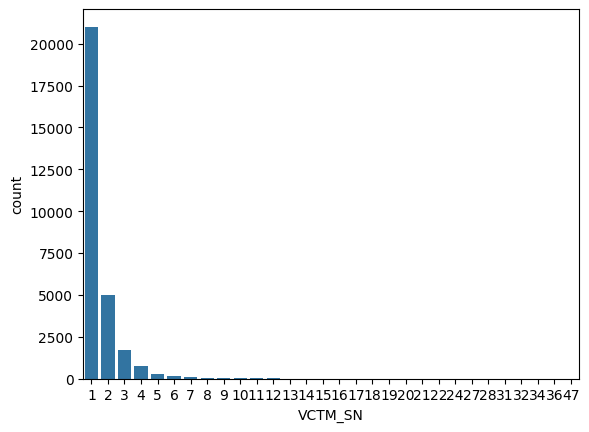

In [131]:
#지급건수 조회 //최대 47건까지 지급받은 사람이 있음 
display(SDB2_I_PT_PMNT_PER.groupby(['ACCD_SN','REQ_SN']).agg({'VCTM_SN':'count'}))
sns.countplot(data =SDB2_I_PT_PMNT_PER.groupby(['ACCD_SN','REQ_SN']).agg({'VCTM_SN':'count'})\
              , x='VCTM_SN' )

# 6.청구 지급상세 사유정보 (SDB2_I_PT_PNTDTL)

## 컬럼 구성 
- 사고번호
- 청구일련번호
- 업권코드 ->삭제 
- 증권번호 
- 피해자물일련번호 ->삭제 
- 지급사유코드
- 지급월
- 상세지급사유코드
- 상세지급일련번호
- 지급 금액
- -------------------------------------------------
- '개인'에 대한 정보만 남김 -> SDB2_I_PT_PNTDTL_PER
  

- 삭제 컬럼 : 업권코드,피해자물일련번호 
- -------------------------------------------------
* 특이사항 
- 지급금액이 (-)인 경우는 없음 


In [132]:
SDB2_I_PT_PMNTDTL['POL_SN'] = SDB2_I_PT_PMNTDTL['POL_SN'].astype(str)
SDB2_I_PT_PMNTDTL_PER = SDB2_I_PT_PMNTDTL[SDB2_I_PT_PMNTDTL['POL_SN'].isin(SDB2_I_CT_COUNT_PVT_PER_2['POL_SN'])]
SDB2_I_PT_PMNTDTL_PER

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
3,122531,103007,6,7984136,665,B2001,202002,1,1,1300
4,1740460,1466487,6,3332223,3298,B2002,201909,1,1,200
6,2256330,1901127,6,1932305,665,B2005,202003,1,1,83
7,631763,398746,6,3827898,2547,B2002,202005,1,1,82
...,...,...,...,...,...,...,...,...,...,...
71244,385388,324468,6,7894826,665,B2002,201910,1,1,170
71245,1410627,1754272,6,6915229,2547,B2002,201811,1,1,11
71246,430262,619986,6,7199202,2547,B2002,201809,1,1,78
71247,2253620,669803,6,5925060,2547,B2001,201807,1,1,1200


In [137]:
SDB2_I_PT_PMNTDTL_PER.describe()

,ACCD_SN,REQ_SN,SCTR_CD,VCTM_SN,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,4.497400e+04,4.497400e+04,44974.000000,44974.00000,44974.000000,44974.000000,44974.000000,44974.000000
mean,1.159181e+06,9.589915e+05,6.296683,1668.86968,201916.884578,1.275982,1.020145,298.621537
std,6.626066e+05,5.271492e+05,0.951803,968.80248,65.567160,3.089244,0.168293,1247.513881
min,9.000000e+00,3.020000e+02,3.000000,19.00000,201806.000000,1.000000,1.000000,0.000000
25%,5.872705e+05,5.471710e+05,6.000000,665.00000,201902.000000,1.000000,1.000000,24.000000
50%,1.155122e+06,9.554420e+05,6.000000,2001.00000,201908.000000,1.000000,1.000000,83.000000
75%,1.744106e+06,1.395091e+06,6.000000,2547.00000,202001.000000,1.000000,1.000000,230.000000
max,2.302470e+06,1.940124e+06,8.000000,3474.00000,202006.000000,41.000000,6.000000,50000.000000


<Axes: xlabel='PMNT_RESN_CD', ylabel='PMNT_AMT'>

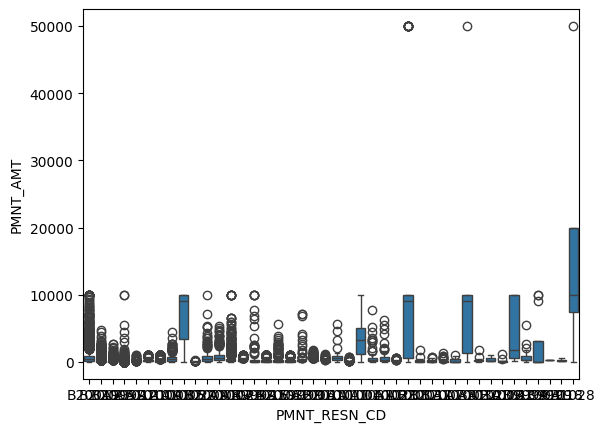

In [136]:
#지급사유별 지급 금액 boxplot
sns.boxplot(data = SDB2_I_PT_PMNTDTL_PER,x='PMNT_RESN_CD',y='PMNT_AMT')


<Axes: xlabel='PMNT_RESN_DTL_CD', ylabel='PMNT_AMT'>

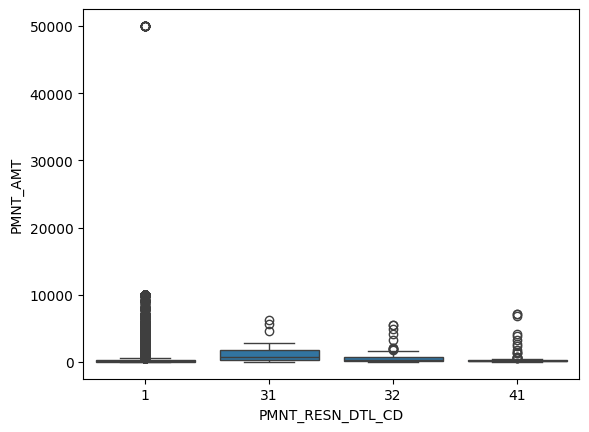

In [135]:
#상세지급사유별 지급 금액 boxplot
sns.boxplot(data = SDB2_I_PT_PMNTDTL_PER,x='PMNT_RESN_DTL_CD',y='PMNT_AMT')

In [140]:
# 지급금액이 -인 경우 (환수)
SDB2_I_PT_PMNTDTL_PER[SDB2_I_PT_PMNTDTL_PER['PMNT_AMT']<0]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
